<a href="https://colab.research.google.com/github/apodrug/9.s912/blob/main/9s912_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.decomposition import PCA
import numpy as np


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# class names are not included, need to create them to plot the images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
print("train_images:", train_images.shape)
print("test_images:", test_images.shape)

train_images: (60000, 28, 28)
test_images: (10000, 28, 28)


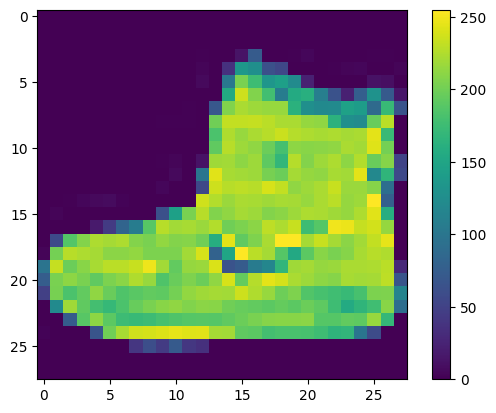

In [ ]:
# Visualize the first image from the training dataset
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)


In [ ]:
# scale the values to a range of 0 to 1 of both data sets
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Model a simple 6-layer neural network
model_6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_6.fit(train_images, train_labels, epochs=5, validation_split=0.2)
test_loss, test_acc = model_6.evaluate(test_images, test_labels)
print("Model - 6 layers - test loss:", test_loss * 100)
print("Model - 6 layers - test accuracy:", test_acc * 100)

Epoch 1/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.5105 - accuracy: 0.8134 - val_loss: 0.4458 - val_accuracy: 0.8336
Epoch 2/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3793 - accuracy: 0.8600 - val_loss: 0.3846 - val_accuracy: 0.8607
Epoch 3/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3456 - accuracy: 0.8731 - val_loss: 0.3514 - val_accuracy: 0.8720
Epoch 4/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3185 - accuracy: 0.8815 - val_loss: 0.3325 - val_accuracy: 0.8808
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3744 - accuracy: 0.8636
Model - 6 layers - test loss: 37.4384880065918
Model - 6 layers - test accuracy: 86.36000156402588


In [ ]:
my_input=test_images
for i in range(5):
    my_input = model_6.get_layer(index=i)(my_input)

In [ ]:
NCOMPONENTS = 3

pca = PCA(n_components=NCOMPONENTS)
pca.fit(my_input)
x=pca.transform(my_input)

print(x.shape)


(10000, 3)


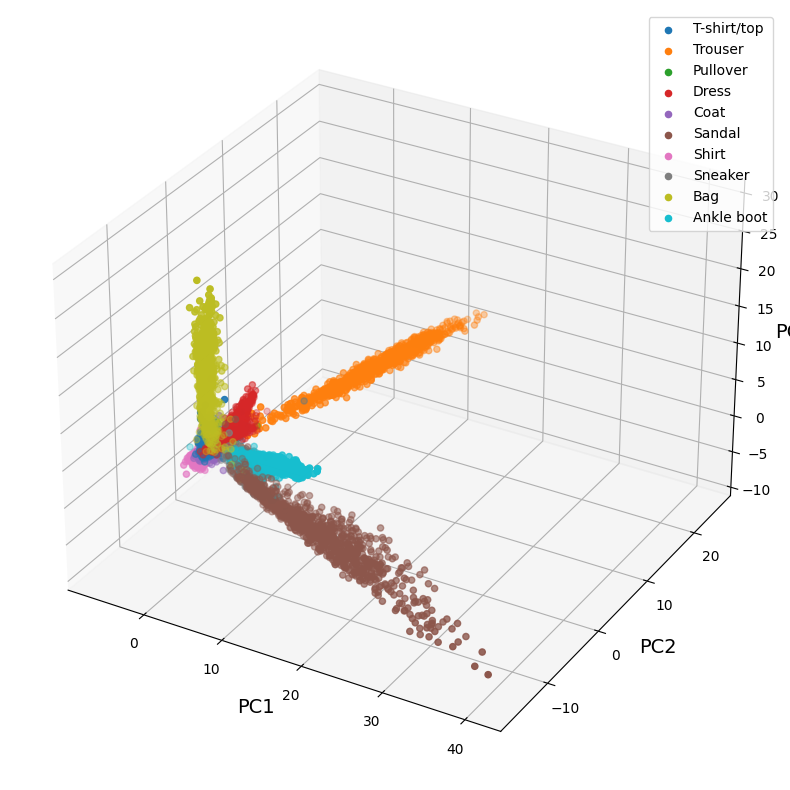

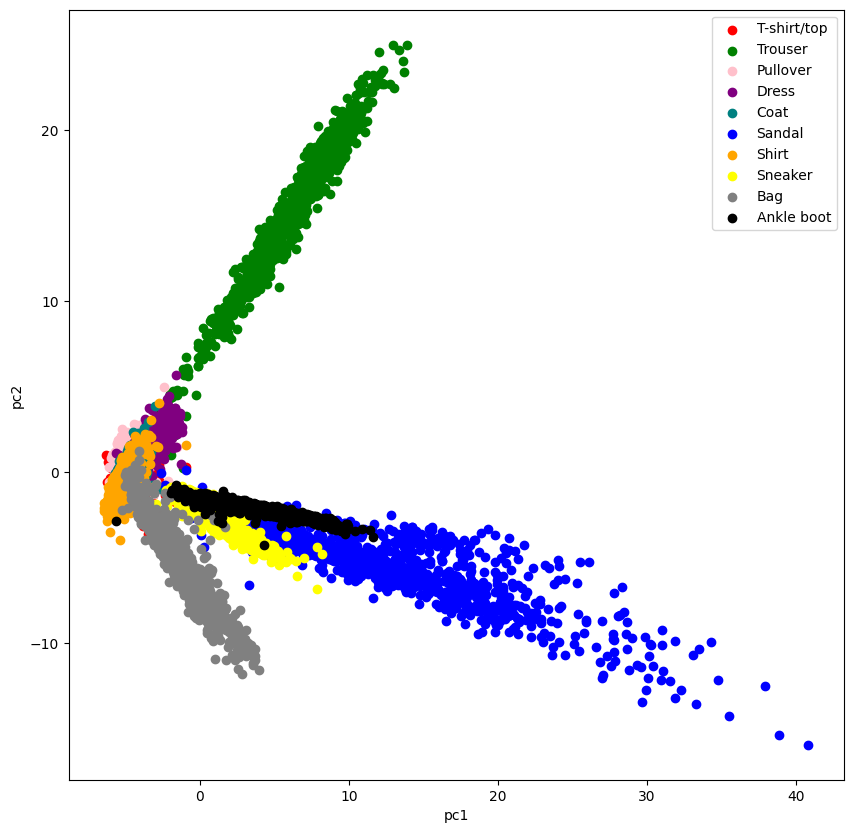

In [ ]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))


plt.figure(figsize=(10,10))

plt.xlabel('pc1')
plt.ylabel('pc2')

# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')

# # x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
# axis.scatter(x[:,0],x[:,1],x[:,2], c=test_labels,cmap='plasma')
# axis.set_xlabel("PC1", fontsize=10)
# axis.set_ylabel("PC2", fontsize=10)
# axis.set_zlabel("PC3", fontsize=10)


cdict={0:'red',1:'green',2:'pink', 3:'purple', 4:'teal', 5:'blue', 6:'orange', 7:'yellow', 8:'grey', 9:'black'}

for l in np.unique(test_labels):
 ix=np.where(test_labels==l)
 axis.scatter(x[ix][:,0], x[ix][:,1], x[ix][:,2], cdict,
           label=class_names[l])
 plt.scatter(x[ix][:,0],x[ix][:,1],c=cdict[l],label=class_names[l])

axis.set_xlabel("PC1", fontsize=14)
axis.set_ylabel("PC2", fontsize=14)
axis.set_zlabel("PC3", fontsize=14)

plt.legend()
axis.legend()
plt.show()